In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import optimizers
from keras.utils import to_categorical

In [3]:
dataset = mnist.load_data(r'D:\code_basket\python\DeepLearning\data\mnist.npz')
(x_train,y_train),(x_test,y_test) = dataset
x_train_flat = x_train.reshape(x_train.shape[0],28*28).astype('float32')/255
x_test_flat = x_test.reshape(x_test.shape[0],28*28).astype('float32')/255
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [4]:
model = Sequential()
model.add(Dense(512,activation="relu",input_shape=(28*28,)))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])

In [5]:
hist = model.fit(x_train_flat,y_train_onehot,epochs=20,batch_size=128,verbose=0)

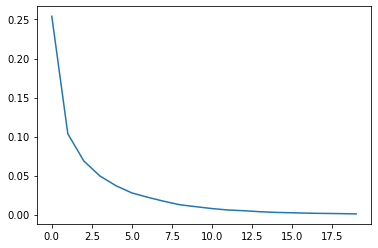

In [6]:
plt.plot(range(len(hist.history['loss'])),hist.history['loss'])

In [7]:
loss,acc = model.evaluate(x_test_flat,y_test_onehot)
print(loss,acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - acc: 0.9841
0.08788871765136719 0.9840999841690063


自测识别率

In [8]:
result = model.predict(x_test_flat,batch_size=40,verbose=1)
result_max = np.argmax(result,axis=1)
test_max = np.argmax(y_test_onehot,axis=1)
result_bool = np.equal(result_max,test_max)
true_total = np.sum(result_bool)
print("识别率",true_total/len(result_bool))

250/250 [==============================] - 0s 828us/step
识别率 0.9841


In [9]:
print(result_max[:50])
print(test_max[:50])
print(np.not_equal(result_max[:50],test_max[:50]))


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


In [10]:
false_image_index = np.not_equal(result_max,test_max)
false_image = x_test[false_image_index]
false_label = y_test[false_image_index]

In [11]:
print(false_image_index)


[False False False ... False False False]


159
(159, 28, 28)
(159,)


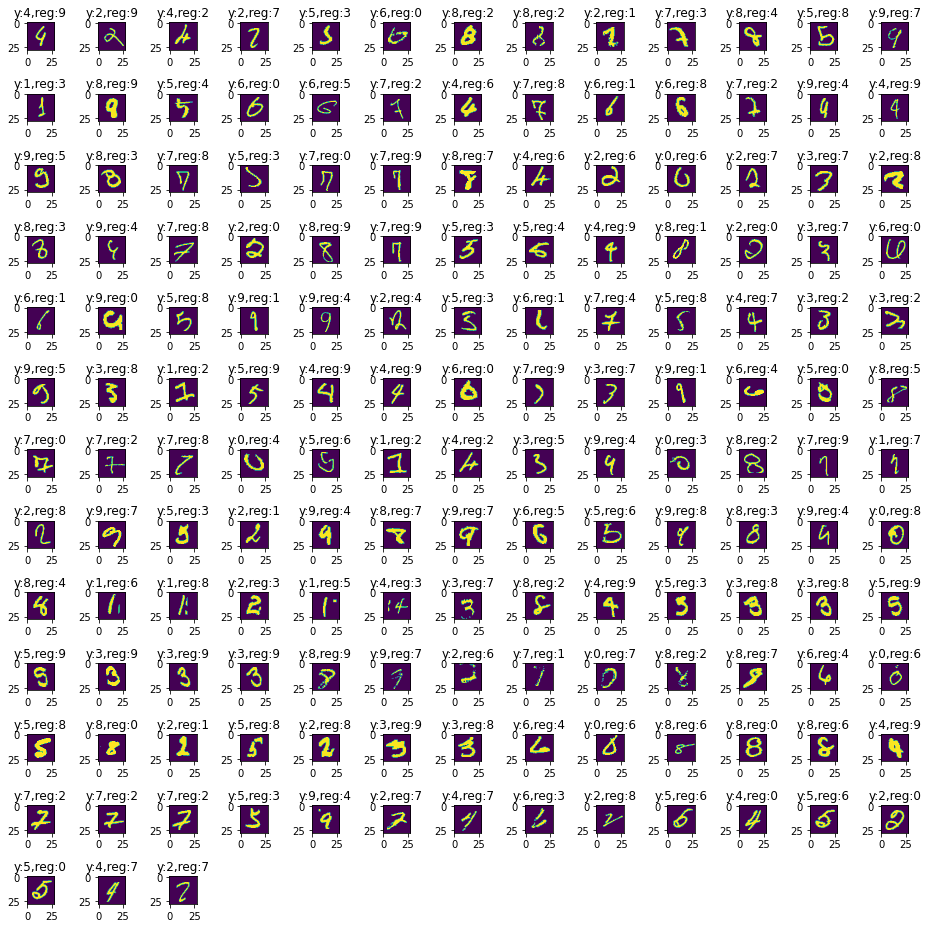

In [12]:
false_num = len(false_image)

print(false_num)
print(false_image.shape)
print(false_label.shape)
fig = plt.figure(figsize=(int(np.sqrt(false_num))+1, int(np.sqrt(false_num))+1))

for index,i in enumerate([index for index,i in enumerate(false_image_index) if  i]):
    sub = fig.add_subplot(int(np.sqrt(false_num))+1, int(np.sqrt(false_num))+1,index+1)
    sub.imshow(x_test[i])
    sub.set_title("y:{},reg:{}".format(y_test[i],result_max[i]))
plt.tight_layout()

保存模型

In [13]:
model.save(r"D:\code_basket\python\DeepLearning\models\mnist.h5")

In [14]:
from keras.models import load_model

In [15]:
load_model = load_model(r"D:\code_basket\python\DeepLearning\models\mnist.h5")

In [16]:
result = load_model.predict(x_test_flat[100:101])

In [17]:
print(np.argmax(result),y_test[100])

6 6
